In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# exporting and understanding our data
data = pd.read_csv('SeoulBikeData.csv', encoding= 'unicode_escape')
print('\nOur data labeled in a table format:')
print(data.head())


Our data labeled in a table format:
         Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0  

In [3]:
print('\nRelevant statistical quantities')
print(data.describe)


Relevant statistical quantities
<bound method NDFrame.describe of             Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibili

In [4]:
print('\nRelevant computation quantities')
print (data.dtypes)
print (data.info())


Relevant computation quantities
Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   

In [5]:
# removing string from our relational dataframe to future analisys
data.drop(['Date', 'Seasons', 'Holiday', 'Functioning Day'], axis=1, inplace=True)
print('\nOur data without string columns:')
print(data.head())


Our data without string columns:
   Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  
0           0


Heatmap to visualize the correlation between the features


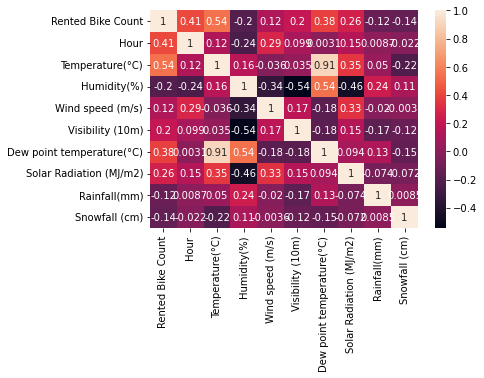

In [31]:
# Heatmap visualization
print('\nHeatmap to visualize the correlation between the features')
corr = data.corr()
ax = sns.heatmap(corr, annot=True)
plt.show()

In [18]:
# labeling our data
# X stands for data/ y stands for target 
X = data[['Hour',
          'Temperature(°C)',
          'Rainfall(mm)'
]].values

y = data['Rented Bike Count']
print(X,y)

[[ 0.  -5.2  0. ]
 [ 1.  -5.5  0. ]
 [ 2.  -6.   0. ]
 ...
 [21.   2.6  0. ]
 [22.   2.1  0. ]
 [23.   1.9  0. ]] 0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 8760, dtype: int64


In [17]:
print("X_shape: ", X.shape)
print("y_shape: ", y.shape)

X_shape:  (8760, 3)
y_shape:  (8760,)


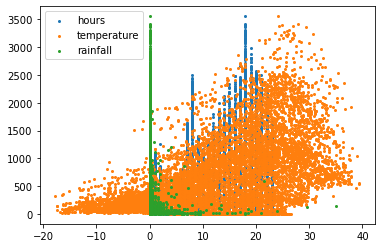

In [19]:
# visualizing the data 
plt.scatter(X.T[0], y, s = 4, label='hours')
plt.scatter(X.T[1], y, s = 4,label='temperature')
plt.scatter(X.T[2], y, s = 4,label='rainfall')
plt.legend()
plt.show()

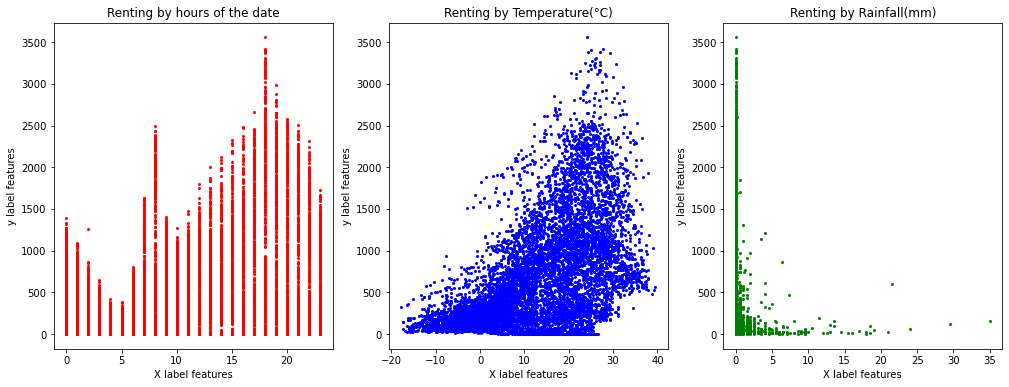

In [20]:
# separating in three plots for better understanding the units
fig, ax = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(17, 6)) 

ax[0].scatter(X.T[0], y, color='r', s = 4)
ax[0].set_title('Renting by hours of the date')
ax[0].set_ylabel('y label features')
ax[0].set_xlabel('X label features')

ax[1].scatter(X.T[1], y, color='b', s = 4)
ax[1].set_title('Renting by Temperature(°C)')
ax[1].set_ylabel('y label features')
ax[1].set_xlabel('X label features')

ax[2].scatter(X.T[2], y, color='g', s = 4)
ax[2].set_title('Renting by Rainfall(mm)')
ax[2].set_ylabel('y label features')
ax[2].set_xlabel('X label features')

plt.show()

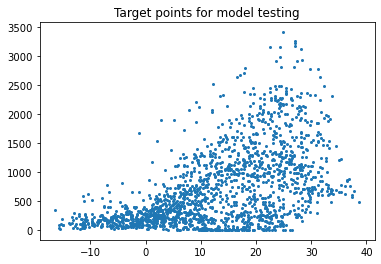

In [21]:
# Let's begin the machine learning exploration!
from sklearn import linear_model
from sklearn.model_selection import train_test_split 

# splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

plt.scatter(X_test.T[1], y_test, s = 4, label = 'data points')
plt.title('Target points for model testing')
plt.show()

In [22]:
# model / algorithm and training - LINEAR REGRESSION
l_reg = linear_model.LinearRegression()
model  = l_reg.fit(X_train, y_train)
predictions = model.predict(X_test)
print('Predictions: ', predictions)
print('R^2 value: ', l_reg.score(X,y))
print('coefficient factor: ', l_reg.coef_)
print('intercept: ', l_reg.intercept_)

Predictions:  [1049.7763998   675.37844682 1077.83246314 ... 1054.75372177 1203.3914812
 -401.57865229]
R^2 value:  0.4311872867493006
coefficient factor:  [  31.95952981   26.98220783 -108.08554431]
intercept:  3.154465231832205


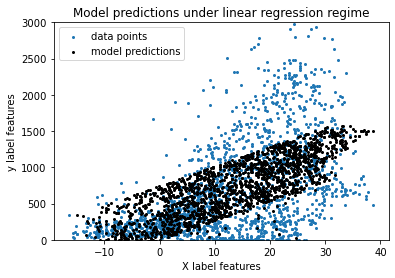

In [23]:
# Overfitting even without test split.
# R^2 aprox accuracy for linear reg, huge fail in the cross-validation test
plt.scatter(X_test.T[1], y_test, s = 4, label = 'data points')
plt.scatter(X_test.T[1], predictions, color="black", s = 4, label = 'model predictions')
plt.title('Model predictions under linear regression regime')
plt.ylabel('y label features')
plt.xlabel('X label features')
plt.ylim([0, 3000])
plt.legend()
plt.show()

In [24]:
# model / algorithm and training - KNN REGRESSION
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor(n_neighbors= 5, weights= 'uniform')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

print("predictions: ", predictions)
print("R^2 value: ", knn.score(X,y))

predictions:  [ 125.   351.8 2300.4 ...   53.8  963.6 2107.8]
R^2 value:  0.7276723377180826


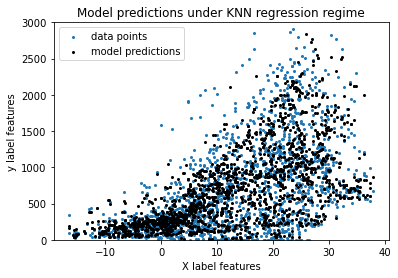

In [25]:
plt.scatter(X_test.T[1], y_test, s = 4, label = 'data points')
plt.scatter(X_test.T[1], predictions, color="black", s = 4, label = 'model predictions')
plt.title('Model predictions under KNN regression regime')
plt.ylabel('y label features')
plt.xlabel('X label features')
plt.ylim([0, 3000])
plt.legend()
plt.show()

In [26]:
# model / algorithm and training - SVM REGRESSION
from sklearn import svm

model =  svm.SVR(kernel='poly')
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("predictions: ", predictions)
print('R^2 value: ', model.score(X,y))

predictions:  [1630.18538078  468.28425193 1523.72609588 ...  274.29614879  685.70623076
 1489.34173479]
R^2 value:  0.41562404050556623


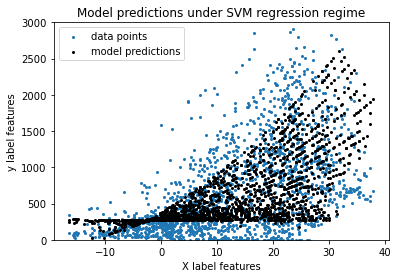

In [27]:
plt.scatter(X_test.T[1], y_test, s = 4, label = 'data points')
plt.scatter(X_test.T[1], predictions, color="black", s = 4, label = 'model predictions')
plt.title('Model predictions under SVM regression regime')
plt.ylabel('y label features')
plt.xlabel('X label features')
plt.ylim([0, 3000])
plt.legend()
plt.show()